In [46]:
import ROOT
from ROOT import gPad, gStyle
import uproot

In [47]:
MEM = []

def draw_eff(input_dir, key):
    c = ROOT.TCanvas('c', '', 500, 500)
    c.cd()
    h_den = input_dir.Get(key)
    h_num = input_dir.Get(key + '_matched')
    eff = ROOT.TEfficiency(h_num, h_den)
    eff.Draw()
    gPad.Draw()
    
    x_axis = eff.GetPaintedGraph().GetXaxis()
    nbinx = x_axis.GetNbins()
    x_min = x_axis.GetBinLowEdge(1)
    x_max = x_axis.GetBinUpEdge(nbinx) + x_axis.GetBinWidth(nbinx)
    
    y_axis = eff.GetPaintedGraph().GetYaxis()
    y_axis.SetRangeUser(0, 1)

    line = ROOT.TLine(0, 0.95, x_max, 0.95)
    line.SetLineColor(ROOT.kGreen)
    line.SetLineStyle(ROOT.kDashed)
    line.SetLineWidth(2)
    line.Draw('SAME')
    gPad.Update()
    return c, eff, line

In [48]:
gStyle.SetOptStat(0)

In [71]:
# path = '../UndergroundCosmicMuME11At0T+2021/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'
# path = '../CMSSW_12_3_0_pre5__fullsim_PU_2021_14TeV-ZMM_14-00002/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'
path = '../EightMu_Pt-0-200_Eta-GE11+2021/DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'

In [72]:
root_file = ROOT.TFile(path)

In [73]:
gem_dir = root_file.Get('DQMData/Run 1/GEM/Run summary')
gem_dir.ls()

TDirectoryFile*		Run summary	Run summary
 KEY: TDirectoryFile	Efficiency;1	Efficiency
 KEY: TDirectoryFile	EventInfo;1	EventInfo


In [74]:
eff_dir = gem_dir.Get('Efficiency')
eff_dir.ls()

TDirectoryFile*		Efficiency	Efficiency
 KEY: TDirectoryFile	GEMCSCSegment;1	GEMCSCSegment
 KEY: TDirectoryFile	GLBMuon;1	GLBMuon
 KEY: TDirectoryFile	STAMuon;1	STAMuon
 KEY: TDirectoryFile	TRKMuon;1	TRKMuon


In [75]:
gemcsc_dir = eff_dir.Get('GEMCSCSegment')
glb_dir = eff_dir.Get('GLBMuon')
sta_dir = eff_dir.Get('STAMuon')
trk_dir = eff_dir.Get('TRKMuon')

(<cppyy.gbl.TCanvas object at 0x66d4fb0>,
 <cppyy.gbl.TLine object at 0x66dceb0>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


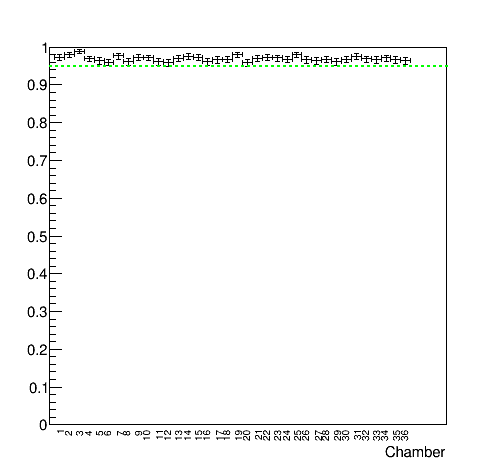

In [77]:
draw_eff(trk_dir, 'Efficiency/chamber_GE11-P-L1')

(<cppyy.gbl.TCanvas object at 0x66f36f0>,
 <cppyy.gbl.TLine object at 0x66f8e30>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


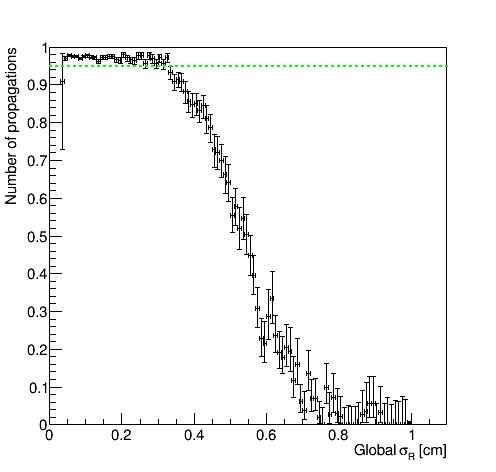

In [80]:
draw_eff(trk_dir, 'Misc/prop_err_r_GE11-P')

(<cppyy.gbl.TCanvas object at 0x66c2db0>,
 <cppyy.gbl.TLine object at 0x66b7640>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


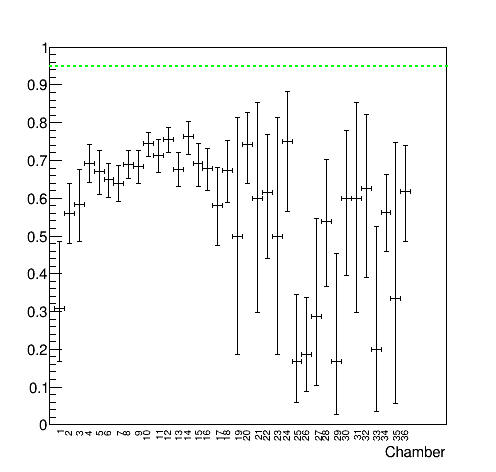

In [63]:
draw_eff(gemcsc_dir, 'Efficiency/muon_chamber_GE11-P-L1')

(<cppyy.gbl.TCanvas object at 0x66cda50>,
 <cppyy.gbl.TLine object at 0x65f5f00>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


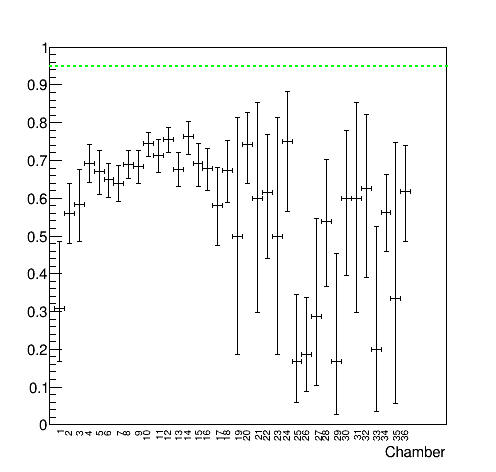

In [64]:
draw_eff(gemcsc_dir, 'Efficiency/muon_chamber_GE11-P-L1')

(<cppyy.gbl.TCanvas object at 0x66d6770>,
 <cppyy.gbl.TLine object at 0x667e880>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


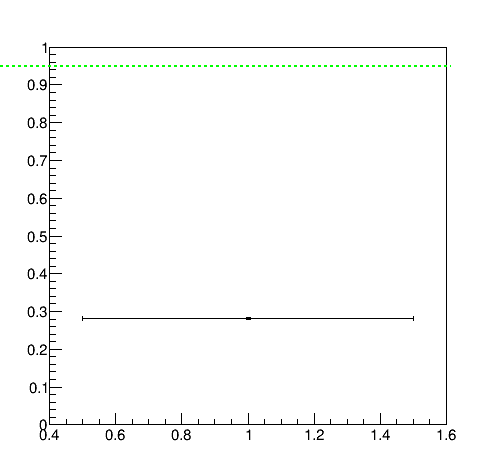

In [65]:
draw_eff(gemcsc_dir, 'Efficiency/me11_gemcsc')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


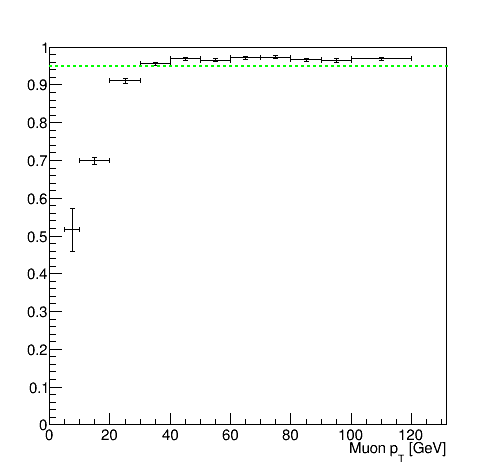

In [42]:
eff = draw_eff(glb_dir, 'Efficiency/muon_pt_GE11-P')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


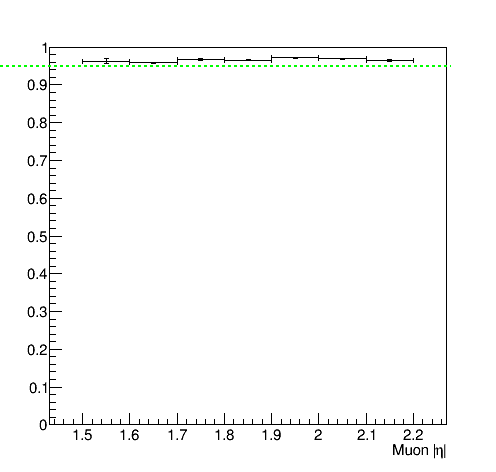

In [43]:
eff = draw_eff(glb_dir, 'Efficiency/muon_eta_GE11-P')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


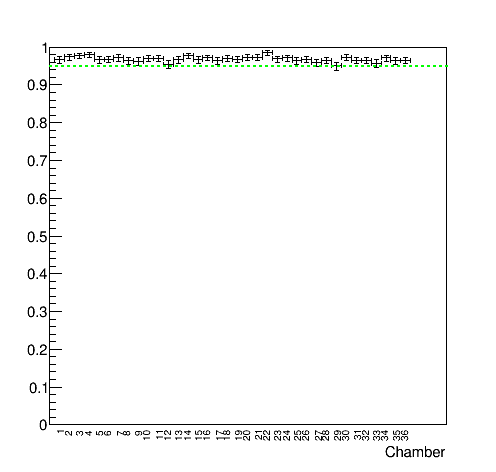

In [45]:
eff = draw_eff(glb_dir, 'Efficiency/chamber_GE11-P-L1')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101
Error in <TAxis::SetBinLabel>: Illegal bin number: 101


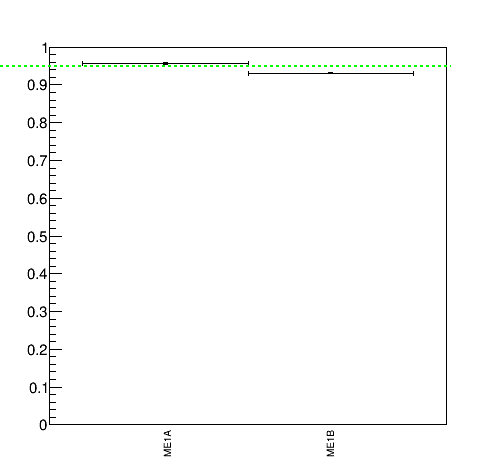

In [36]:
eff = draw_eff(glb_dir, 'Misc/start_det_GE11-P')

(<cppyy.gbl.TCanvas object at 0x665c360>,
 <cppyy.gbl.TLine object at 0x67673c0>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


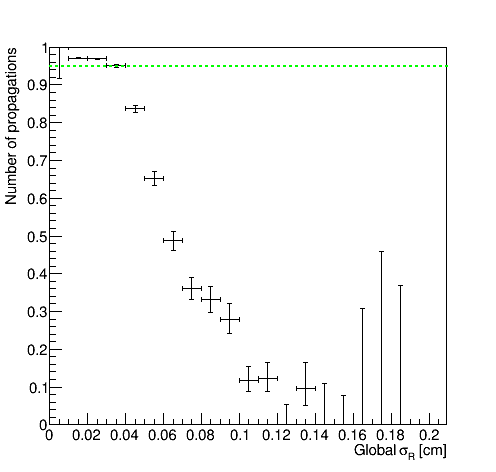

In [37]:
draw_eff(glb_dir, 'Misc/prop_err_r_GE11-P')

(<cppyy.gbl.TCanvas object at 0x675b260>,
 <cppyy.gbl.TLine object at 0x66659e0>)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


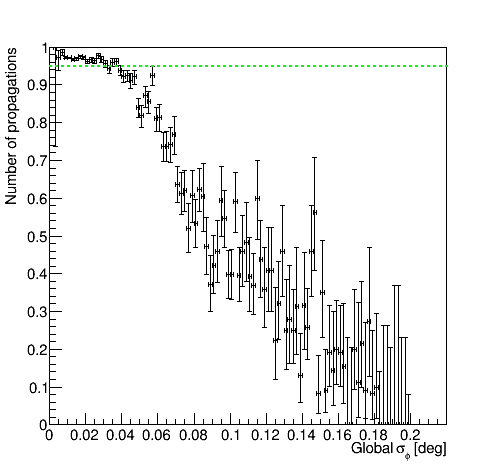

In [38]:
draw_eff(glb_dir, 'Misc/prop_err_phi_GE11-P')